In [28]:
# https://github.com/LukeDitria/pytorch_tutorials/blob/main/section02_pytorch_basics/notebooks/Tutorial1_Pytorch_Basics.ipynb

In [29]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Lets create some tensors, requires_grad tells Pytorch we want to store the gradients for this tensor
# we need to do this if we are working with basic Pytorch tensors
x = torch.tensor([4], dtype=torch.float32)
x.requires_grad = True
w = torch.tensor([2], dtype=torch.float32)
w.requires_grad = True
b = torch.tensor([3], dtype=torch.float32)
b.requires_grad = True

In [31]:
# By performing a simple computation Pytorch will build a computational graph.
y = w * x + b    # y = 2 * x + 3

# It's easy to see that
# dy/dx = w = 2
# dy/dw = x = 4
# dy/db = 1

# Compute gradients via Pytorch's Autograd
y.backward()

# Print out the calculated gradients
# These gradients are the gradients with respect to the point where we backprop'd from - y
# Create your own equation and use the auto backprop to see the partial derivatives!
print("Calculated Gradients") 
print("dy/dx", x.grad.item())    # x.grad = dy/dx = 2 
print("dy/dw", w.grad.item())    # w.grad = dy/dw = 4
print("dy/db", b.grad.item())   # b.grad = dy/db = 1  
# Note: .item() simply returns a 0D Tensor as a Python scalar

Calculated Gradients
dy/dx 2.0
dy/dw 4.0
dy/db 1.0


**Finding the minimum**

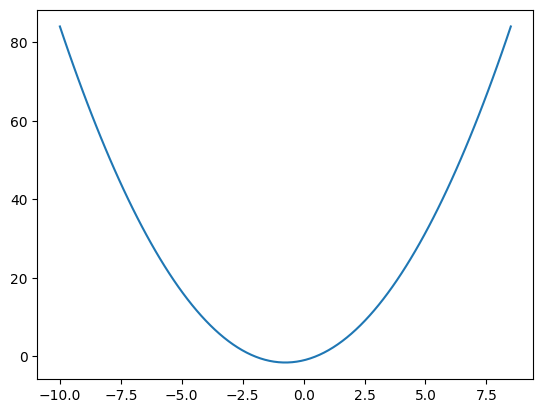

In [32]:
# Lets find the minimum of a parabola!

# Define the equation as a lambda function
def fx(x):
    return x ** 2 + 1.5 * x - 1

space_x = np.linspace(-10, 8.5, 100)

plt.plot(space_x, fx(space_x))

In [33]:
x = torch.randn(1, requires_grad=True)
print("x:", x)

y = fx(x)
print("y:", y)

y.backward()

dydx = x.grad.item()

print("dy/dx:", dydx)

x: tensor([-0.6034], requires_grad=True)
y: tensor([-1.5410], grad_fn=<SubBackward0>)
dy/dx: 0.29323017597198486


In [35]:
# Lets take some steps to decend the gradient!

x = torch.randn(1, requires_grad=True)

x_logger = []
y_logger = []

# We'll keep track of how many steps we've done
counter = 0

# Set a scale for the step size
learning_rate = 0.01

dydx = 1000
steps_limit = 1000

while dydx > 0.01 and counter < steps_limit:
    y = fx(x)
    y.backward()
    dydx = x.grad.item()
    print("dydx", dydx)
    
    with torch.no_grad():
        x -= learning_rate * dydx
        x.grad.zero_()

        x_logger.append(x.item())
        y_logger.append(y.item())

    counter += 1

print("Y minimum is %.2f and is when X = %.2f, found after %d steps" % (y.item(), x.item(), counter))

dydx 0.3165625333786011
dydx 0.3102313280105591
dydx 0.30402672290802
dydx 0.2979462146759033
dydx 0.2919872999191284
dydx 0.2861475944519043
dydx 0.2804245948791504
dydx 0.2748161554336548
dydx 0.2693197727203369
dydx 0.2639334201812744
dydx 0.25865471363067627
dydx 0.2534816265106201
dydx 0.24841201305389404
dydx 0.24344372749328613
dydx 0.23857486248016357
dydx 0.233803391456604
dydx 0.22912728786468506
dydx 0.22454476356506348
dydx 0.22005391120910645
dydx 0.21565282344818115
dydx 0.21133971214294434
dydx 0.20711290836334229
dydx 0.20297062397003174
dydx 0.19891119003295898
dydx 0.1949329376220703
dydx 0.19103431701660156
dydx 0.18721365928649902
dydx 0.18346941471099854
dydx 0.17980003356933594
dydx 0.17620408535003662
dydx 0.17268002033233643
dydx 0.16922640800476074
dydx 0.1658419370651245
dydx 0.16252505779266357
dydx 0.15927457809448242
dydx 0.15608906745910645
dydx 0.15296733379364014
dydx 0.1499079465866089
dydx 0.14690983295440674
dydx 0.14397168159484863
dydx 0.14109230041